In [447]:
from matplotlib import pyplot as plt
from PIL import Image
import numpy as np

In [448]:
def load_image_as_matrix(image_path):
    """
    Wczytuje obraz i konwertuje go do macierzy pikseli.

    Parameters:
    image_path (str): Ścieżka do pliku obrazu.

    Returns:
    numpy.ndarray: Macierz pikseli obrazu.
    """

    img = Image.open(image_path)

    img_matrix = np.array(img)

    return img_matrix.astype(np.uint16)

In [449]:
l = load_image_as_matrix("./photos/ruleta.jpg")

In [450]:
def print_image_to_console(img_matrix):
    """
    Wyświetla obraz kolorowy lub czarno-biały na konsoli na podstawie macierzy pikseli.

    Parameters:
    img_matrix (numpy.ndarray): Macierz pikseli obrazu.
    """

    # Sprawdź, czy obraz jest czarno-biały czy kolorowy
    if img_matrix.ndim == 2:
        # Obraz w skali szarości
        plt.imshow(img_matrix, cmap='gray')
    elif img_matrix.ndim == 3 and img_matrix.shape[2] == 3:
        # Obraz kolorowy
        plt.imshow(img_matrix)
    else:
        raise ValueError("Nieobsługiwany format obrazu.")

    plt.axis('off')  # Wyłącz osie
    plt.show()


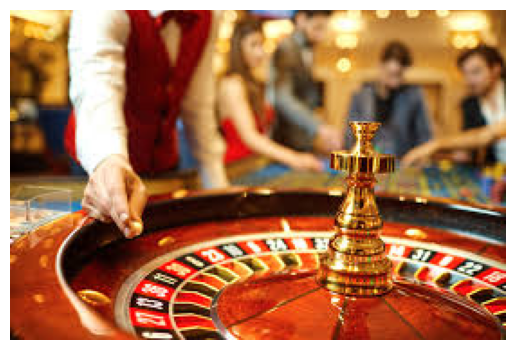

In [451]:
print_image_to_console(l)

In [452]:
def convert_to_grayscale(img_matrix):
    """
    Konwertuje kolorową macierz obrazu do skali szarości.

    Parameters:
    img_matrix (numpy.ndarray): Kolorowa macierz pikseli obrazu (wysokość x szerokość x 3).

    Returns:
    numpy.ndarray: Macierz pikseli obrazu w skali szarości.
    """

    
    grayscale_matrix = img_matrix.copy() 
    grayscale_matrix = np.dot(grayscale_matrix[:,:,:3], [0.299, 0.587, 0.114])


    return grayscale_matrix


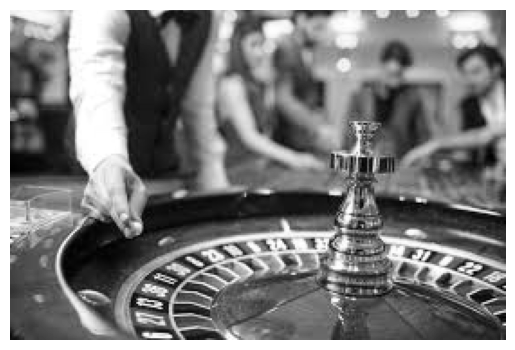

In [453]:
g = convert_to_grayscale(l)
print_image_to_console(g)

In [454]:
def binarize(img_matrix, threshold):
    """
    Binaruzuje obraz w skali szarości.

    Parameters:
    img_matrix (numpy.ndarray): Macierz pikseli obrazu w skali szarości.
    threshold (int): Próg binaryzacji.

    Returns:
    numpy.ndarray: Macierz pikseli obrazu binaruzowanego.
    """

    binarized_matrix = img_matrix.copy()
    binarized_matrix[binarized_matrix < threshold] = 0
    binarized_matrix[binarized_matrix >= threshold] = 255

    return binarized_matrix

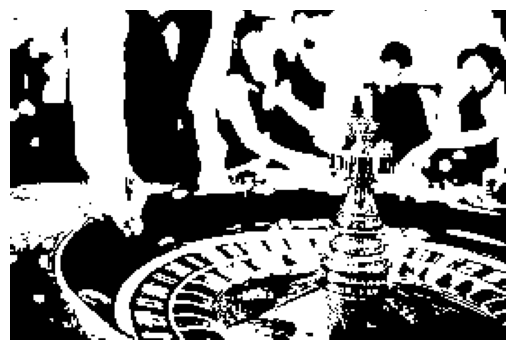

In [455]:
print_image_to_console(binarize(g, 100))

In [489]:
def adjust_light(img_matrix, brightness):
    """
    Reguluje jasność obrazu.

    Parameters:
    img_matrix (numpy.ndarray): Macierz pikseli obrazu w skali szarości.
    factor (float): Współczynnik jasności.

    Returns:
    numpy.ndarray: Macierz pikseli obrazu z dostosowaną jasnością.
    """

    image = img_matrix.copy()
    
    a = [0.299, 0.587, 0.114]
    if len(image.shape) == 3:
        for i in range(3):
            image[:,:,i] = image[:,:,i] + brightness*a[i]
    return np.clip(image, 0, 255).astype(np.uint8) 

In [490]:
l[:,:,0] +10

array([[258, 262, 265, ..., 137, 132, 127],
       [255, 259, 260, ..., 138, 132, 127],
       [265, 265, 263, ..., 139, 133, 127],
       ...,
       [ 37,  66,  97, ..., 116,  92,  70],
       [ 33,  48,  59, ..., 106,  80,  54],
       [ 36,  36,  37, ..., 107,  80,  56]], dtype=uint16)

In [494]:
import numpy as np

def adjust_light_luminance(img_matrix, brightness):
    """
    Adjusts the brightness of an image using a luminance-based approach.

    Parameters:
    img_matrix (numpy.ndarray): Image pixel matrix (RGB).
    brightness (float): Brightness adjustment factor.

    Returns:
    numpy.ndarray: Image with adjusted brightness.
    """
    
    image = img_matrix.astype(np.float32)  # Prevent overflow
    
    if len(image.shape) == 3:  # RGB Image
        # Apply luminance-based brightness adjustment
        image[:, :, 0] += brightness * 0.299  # Red channel
        image[:, :, 1] += brightness * 0.587  # Green channel
        image[:, :, 2] += brightness * 0.114  # Blue channel
    else:  # Grayscale image, apply uniform brightness
        image += brightness  

    return np.clip(image, 0, 255).astype(np.uint8)  # Convert back to uint8


In [499]:
import cv2
import numpy as np

def adjust_light_hsl(img_matrix, brightness):
    """
    Adjusts the brightness of an RGB image using the HSL color model.

    Parameters:
    img_matrix (numpy.ndarray): RGB image.
    brightness (float): Brightness adjustment factor (-255 to 255).

    Returns:
    numpy.ndarray: Image with adjusted brightness.
    """
    
    # Convert from RGB to HLS
    hls_image = cv2.cvtColor(img_matrix, cv2.COLOR_RGB2HLS).astype(np.float32)
    
    # Modify the Lightness channel (HLS format: H = 0, L = 1, S = 2)
    hls_image[:, :, 1] = np.clip(hls_image[:, :, 1] + brightness, 0, 255)
    
    # Convert back to RGB
    adjusted_rgb = cv2.cvtColor(hls_image.astype(np.uint8), cv2.COLOR_HLS2RGB)
    
    return adjusted_rgb


ModuleNotFoundError: No module named 'cv2'

In [500]:
import numpy as np

def rgb_to_hsl(image):
    """
    Converts an RGB image to HSL using matrix operations.

    Parameters:
    image (numpy.ndarray): RGB image.

    Returns:
    tuple: H, S, L channels as separate NumPy arrays.
    """
    image = image.astype(np.float32) / 255.0  # Normalize to [0,1]
    
    r, g, b = image[:,:,0], image[:,:,1], image[:,:,2]
    
    max_rgb = np.max(image, axis=2)
    min_rgb = np.min(image, axis=2)
    delta = max_rgb - min_rgb

    # Compute Lightness
    L = (max_rgb + min_rgb) / 2

    # Compute Saturation
    S = np.zeros_like(L)
    mask = delta != 0
    S[mask] = delta[mask] / (1 - np.abs(2 * L[mask] - 1))

    # Compute Hue
    H = np.zeros_like(L)
    mask_r = (max_rgb == r) & mask
    mask_g = (max_rgb == g) & mask
    mask_b = (max_rgb == b) & mask

    H[mask_r] = ((g - b)[mask_r] / delta[mask_r]) % 6
    H[mask_g] = ((b - r)[mask_g] / delta[mask_g]) + 2
    H[mask_b] = ((r - g)[mask_b] / delta[mask_b]) + 4
    H *= 60  # Convert to degrees

    return H, S, L

def hsl_to_rgb(H, S, L):
    """
    Converts HSL back to RGB using matrix operations.

    Parameters:
    H (numpy.ndarray): Hue channel.
    S (numpy.ndarray): Saturation channel.
    L (numpy.ndarray): Lightness channel.

    Returns:
    numpy.ndarray: Reconstructed RGB image.
    """
    C = (1 - np.abs(2 * L - 1)) * S
    X = C * (1 - np.abs((H / 60) % 2 - 1))
    m = L - C / 2

    R, G, B = np.zeros_like(H), np.zeros_like(H), np.zeros_like(H)

    mask_0 = (H >= 0) & (H < 60)
    mask_1 = (H >= 60) & (H < 120)
    mask_2 = (H >= 120) & (H < 180)
    mask_3 = (H >= 180) & (H < 240)
    mask_4 = (H >= 240) & (H < 300)
    mask_5 = (H >= 300) & (H < 360)

    R[mask_0], G[mask_0], B[mask_0] = C[mask_0], X[mask_0], 0
    R[mask_1], G[mask_1], B[mask_1] = X[mask_1], C[mask_1], 0
    R[mask_2], G[mask_2], B[mask_2] = 0, C[mask_2], X[mask_2]
    R[mask_3], G[mask_3], B[mask_3] = 0, X[mask_3], C[mask_3]
    R[mask_4], G[mask_4], B[mask_4] = X[mask_4], 0, C[mask_4]
    R[mask_5], G[mask_5], B[mask_5] = C[mask_5], 0, X[mask_5]

    R, G, B = (R + m) * 255, (G + m) * 255, (B + m) * 255
    return np.clip(np.stack([R, G, B], axis=2), 0, 255).astype(np.uint8)

def adjust_light_hsl_matrix(image, brightness):
    """
    Adjusts brightness using manual HSL conversion with matrix operations.

    Parameters:
    image (numpy.ndarray): RGB image.
    brightness (float): Brightness adjustment factor (-1 to 1).

    Returns:
    numpy.ndarray: Brightness-adjusted RGB image.
    """
    H, S, L = rgb_to_hsl(image)
    
    # Adjust lightness
    L = np.clip(L + brightness, 0, 1)
    
    return hsl_to_rgb(H, S, L)


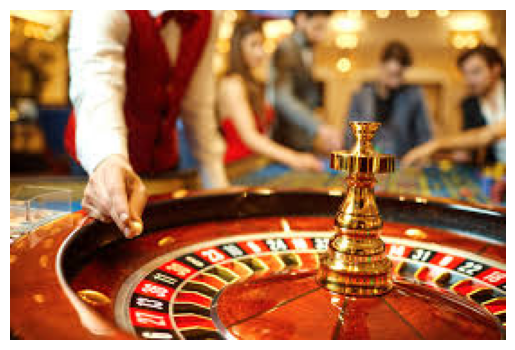

In [519]:
a = adjust_light_hsl_matrix(l,0)
print_image_to_console(a)

In [335]:
import numpy as np
from PIL import Image

def rgb_to_hsv(image: np.ndarray) -> np.ndarray:
    """ Konwertuje obraz RGB do HSV macierzowo. """
    image = image.astype(np.float32) / 255.0  # Normalizacja do [0,1]

    R, G, B = image[..., 0], image[..., 1], image[..., 2]
    V = np.max(image, axis=-1)  # Value (maksymalna składowa)
    C = V - np.min(image, axis=-1)  # Chroma (różnica między max i min)

    S = np.zeros_like(V)
    S[V > 0] = C[V > 0] / V[V > 0]  # Saturacja: jeśli V=0, to S=0

    H = np.zeros_like(V)
    
    mask = (C > 0)
    H[mask & (V == R)] = (G[mask & (V == R)] - B[mask & (V == R)]) / C[mask & (V == R)]
    H[mask & (V == G)] = 2.0 + (B[mask & (V == G)] - R[mask & (V == G)]) / C[mask & (V == G)]
    H[mask & (V == B)] = 4.0 + (R[mask & (V == B)] - G[mask & (V == B)]) / C[mask & (V == B)]
    
    H = (H / 6.0) % 1.0  # Normalizacja do zakresu [0,1]

    return np.stack([H, S, V], axis=-1)

def hsv_to_rgb(image_hsv: np.ndarray) -> np.ndarray:
    """ Konwertuje obraz HSV do RGB macierzowo. """
    H, S, V = image_hsv[..., 0], image_hsv[..., 1], image_hsv[..., 2]

    C = V * S  # Chroma
    X = C * (1 - np.abs((H * 6) % 2 - 1))
    m = V - C

    R, G, B = np.zeros_like(H), np.zeros_like(H), np.zeros_like(H)

    mask = (H < 1 / 6)
    R[mask], G[mask], B[mask] = C[mask], X[mask], 0

    mask = (H >= 1 / 6) & (H < 2 / 6)
    R[mask], G[mask], B[mask] = X[mask], C[mask], 0

    mask = (H >= 2 / 6) & (H < 3 / 6)
    R[mask], G[mask], B[mask] = 0, C[mask], X[mask]

    mask = (H >= 3 / 6) & (H < 4 / 6)
    R[mask], G[mask], B[mask] = 0, X[mask], C[mask]

    mask = (H >= 4 / 6) & (H < 5 / 6)
    R[mask], G[mask], B[mask] = X[mask], 0, C[mask]

    mask = (H >= 5 / 6)
    R[mask], G[mask], B[mask] = C[mask], 0, X[mask]

    return np.clip(np.stack([(R + m), (G + m), (B + m)], axis=-1) * 255, 0, 255).astype(np.uint8)

def adjust_brightness(image: np.ndarray, brightness: int) -> np.ndarray:
    """ 
    Zmienia jasność obrazu macierzowo w przestrzeni HSV. 
    Przyciemnia przez odejmowanie, rozjaśnia przez skalowanie.
    """
    if len(image.shape) == 2:  # Obraz w skali szarości
        image = image.astype(np.int16) + brightness
        image = np.clip(image, 0, 255).astype(np.uint8)
        return image

    # Konwersja RGB → HSV
    image_hsv = rgb_to_hsv(image)

    # Zmiana jasności (Value - V)
    if brightness < 0:
        image_hsv[..., 2] = np.clip(image_hsv[..., 2] + brightness / 255.0, 0, 1)
    else:
        image_hsv[..., 2] = np.clip(image_hsv[..., 2] * (1 + brightness / 255.0), 0, 1)

    # Konwersja HSV → RGB
    return hsv_to_rgb(image_hsv)

